In [377]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [378]:
import math 
import numpy as np
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [379]:
def generate_data_with_gaussian_noise(scaling_factor, total_number_of_data_points):
    dataset = []
    while total_number_of_data_points > 0:
        x = round(random.uniform(-10, 10), 2)
        noise = scaling_factor * np.random.normal(0, 1)
        y = (-2 * math.cos(x) / math.pi) + (x / math.pi) - (2 * math.cos(3 * x) / (3 * math.pi)) + noise
        dataset.append((x,y))
        total_number_of_data_points-=1
    return dataset

In [380]:
def find_error(Y_true, Y_pred):
    n = len(Y_true)
    mean_square_error = 0
    for i in range (n):
       mean_square_error = mean_square_error + (Y_true[i] - Y_pred[i][0]) ** 2
    mean_square_error = mean_square_error / n
    return mean_square_error

In [381]:
def polynomial_regression_sklearn(X, Y, degree):
    X = np.array(X)
    Y = np.array(Y)
    X = X.reshape(-1, 1)
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, Y)
    return model.coef_

In [382]:
def polynomial_regressor_gaus(X, Y, degree):
    coefficients = polynomial_regression_sklearn(X, Y, degree)
    Y_pred = []
    n = len(X)
    for i in range (n):
        y_pred = 0
        for deg in range (degree+1):
            y_pred = y_pred + coefficients * pow(X[i], deg)
        Y_pred.append(y_pred)
    return Y_pred

In [383]:
random.seed(65)
total_number_of_data_points = 50
scaling_factor = 0.1
dataset50 = generate_data_with_gaussian_noise(scaling_factor, total_number_of_data_points)
X = [dataset_instance[0] for dataset_instance in dataset50]
Y = [dataset_instance[1] for dataset_instance in dataset50]

In [384]:
print(dataset50)

[(-1.71, -0.4068053456920109), (-4.25, -1.1828782272868545), (6.89, 1.7848868478558104), (-1.12, -0.3919204980391801), (0.57, -0.1824474610721073), (1.03, 0.42503593622824853), (-3.22, -0.005045891330461738), (2.79, 1.5915464690388468), (8.0, 2.480507727020749), (-8.56, -2.4709973594972774), (1.22, 0.3996031304808252), (-4.72, -1.5708632286686872), (3.11, 2.0633328591819264), (2.47, 1.2172213134239478), (-9.09, -2.2833793134749754), (-7.74, -2.3579228014030145), (0.57, -0.3002242303528335), (7.17, 1.9705199981824542), (5.95, 1.122938028805948), (6.48, 1.417872721256543), (-7.26, -2.528546229825148), (-2.99, -0.1870210948092539), (1.54, 0.648119584650312), (-2.67, -0.2679984288196856), (-5.39, -1.8731179141466392), (8.44, 2.835607489369386), (2.7, 1.3376085473963413), (-2.04, -0.5101345556184967), (-0.48, -0.8646898382111176), (3.99, 1.5371746243804887), (5.19, 1.59657829827224), (5.59, 1.4775552897117021), (-3.31, -0.13392578875863342), (9.35, 3.797529146108428), (5.26, 1.4750139736299

In [385]:
def plotGraph(X, Y, title):
    fig, ax = plt.subplots()
    ax.set_xlim(0, 20)
    ax.set_ylim(0, 10000)
    plt.plot(X, Y, marker='o', linestyle='-', color='b', label='Data Points')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(title)
    plt.legend()  
    plt.show()

In [386]:
def scatter_plot(X, Y, title):
    fig, ax = plt.subplots()
    ax.set_xlim(-11, 11)
    ax.set_ylim(-10, 10)
    plt.scatter(X, Y, marker='o', color='blue')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(title)
    plt.legend()  
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[-1.71, -4.25, 6.89, -1.12, 0.57, 1.03, -3.22, 2.79, 8.0, -8.56, 1.22, -4.72, 3.11, 2.47, -9.09, -7.74, 0.57, 7.17, 5.95, 6.48, -7.26, -2.99, 1.54, -2.67, -5.39, 8.44, 2.7, -2.04, -0.48, 3.99, 5.19, 5.59, -3.31, 9.35, 5.26, -4.59, -6.56, -1.4, -4.79, 7.55, -9.81, 6.36, -6.76, 6.24, -1.35, -7.36, 9.71, -1.62, 9.57, -3.55]
[-0.4068053456920109, -1.1828782272868545, 1.7848868478558104, -0.3919204980391801, -0.1824474610721073, 0.42503593622824853, -0.005045891330461738, 1.5915464690388468, 2.480507727020749, -2.4709973594972774, 0.3996031304808252, -1.5708632286686872, 2.0633328591819264, 1.2172213134239478, -2.2833793134749754, -2.3579228014030145, -0.3002242303528335, 1.9705199981824542, 1.122938028805948, 1.417872721256543, -2.528546229825148, -0.1870210948092539, 0.648119584650312, -0.2679984288196856, -1.8731179141466392, 2.835607489369386, 1.3376085473963413, -0.5101345556184967, -0.8646898382111176, 1.5371746243804887, 1.59657829827224, 1.4775552897117021, -0.13392578875863342, 3.7

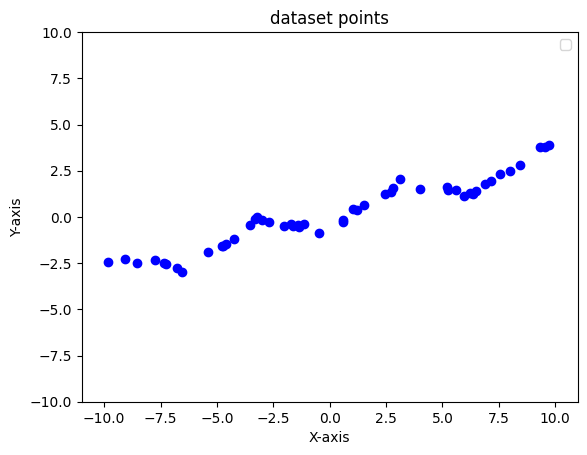

In [387]:
print(X)
print(Y)
plotGraph1(X, Y, 'dataset points')

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0.308134841846267, 176.01968227750066, 9513.586105740867, 845053.6239711578, 73915541.07708503, 6776901556.739166, 631798277047.9111, 65871352249225.68, 5127929841680456.0, 4.981082962297349e+17, 6.0219920213894685e+19, 5.642796427760752e+21, 6.087084850898596e+23, 5.423114245343151e+25, 5.640994488572336e+27, 3.003312052113286e+28, 2.2765576159208336e+25, 1.3739232480718323e+27, 1.0357736480453958e+24, 3.6198025554839863e+20]


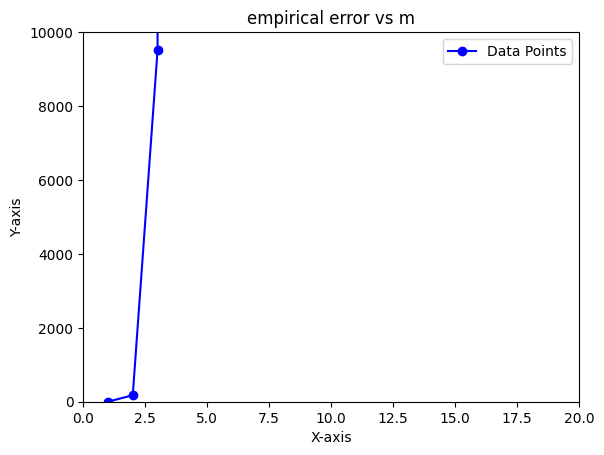

In [388]:
empirical_errors = []
m = []
for i in range (1,21):
    Y_pred = polynomial_regressor_gaus(X, Y, i)
    empirical_error = find_error(Y, Y_pred)
    m.append(i)
    empirical_errors.append(empirical_error)

title = 'empirical error vs m'
print(m)
print(empirical_errors)
plotGraph(m, empirical_errors, title)

In [389]:
total_number_of_data_points = 500
scaling_factor = 0.1
dataset500 = generate_data_with_gaussian_noise(scaling_factor, total_number_of_data_points)
X = [dataset_instance[0] for dataset_instance in dataset500]
Y = [dataset_instance[1] for dataset_instance in dataset500]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0.34762878719844975, 220.04145877394268, 16265.66758045713, 1304013.7296078205, 122906749.67353402, 10046704959.177422, 971892973278.8737, 72636707255388.56, 6496837617604362.0, 5.219199366090131e+17, 4.893949470362487e+19, 4.2727375207851995e+21, 3.805419850412028e+23, 3.5200730411074725e+25, 3.161848778748515e+27, 2.051406812997017e+27, 1.720912364307657e+25, 7.608321795687284e+26, 2.290711918411964e+23, 4.09048364782353e+17]


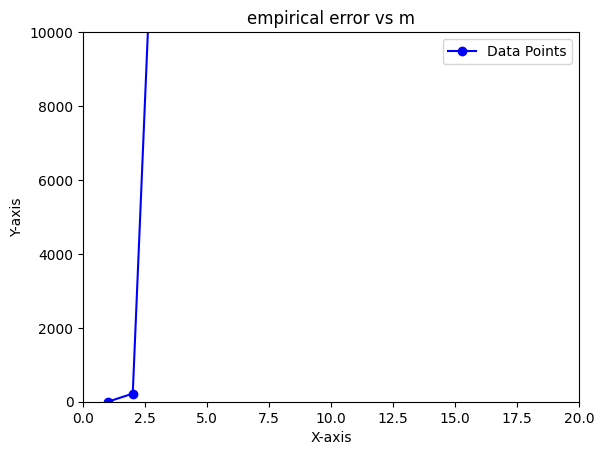

In [390]:
empirical_errors = []
m = []
for i in range (1,21):
    Y_pred = polynomial_regressor_gaus(X, Y, i)
    empirical_error = find_error(Y, Y_pred)
    m.append(i)
    empirical_errors.append(empirical_error)

title = 'empirical error vs m'
print(m)
print(empirical_errors)
plotGraph(m, empirical_errors, title)